## Observations and Insights 

In [117]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data_df = pd.merge(mouse_metadata, study_results, how ="outer", on="Mouse ID")
# Display the data table for preview
combined_tables_df=pd.DataFrame(combined_mouse_data_df)
combined_tables_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [118]:
# Checking the number of mice.
mice_count= combined_tables_df["Mouse ID"].value_counts()
mice_count

g989    13
l509    10
r604    10
c832    10
x773    10
        ..
f932     1
t573     1
x336     1
v199     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [119]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_count = len(mice_count)
mice_count

249

In [120]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id = combined_tables_df[combined_tables_df.duplicated(subset=["Mouse ID","Timepoint"], keep =False)]
dup_mouse_id                                                               

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [121]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_dup_mice_df= combined_tables_df[combined_tables_df["Mouse ID"] != "g989"]
dropped_dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [122]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_num=dropped_dup_mice_df["Mouse ID"].value_counts()
print(cleaned_mice_num)

l509    10
r604    10
a818    10
s710    10
c832    10
        ..
x226     1
h428     1
b447     1
n482     1
l872     1
Name: Mouse ID, Length: 248, dtype: int64


In [123]:
cleaned_mice_num=len(cleaned_mice_num)
cleaned_mice_num

248

## Summary Statistics

In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_regimen = dropped_dup_mice_df.groupby(["Drug Regimen"])
group_regimen
group_regimen.count().head(10)
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [125]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = group_regimen["Tumor Volume (mm3)"].mean()
regimen_median= group_regimen["Tumor Volume (mm3)"].median()
regimen_var=group_regimen["Tumor Volume (mm3)"].var()
regimen_std = group_regimen["Tumor Volume (mm3)"].std()
regimen_sem = group_regimen["Tumor Volume (mm3)"].sem()
regimen_mean
# Assemble the resulting series into a single summary dataframe.

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [126]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_summary=pd.DataFrame({"Mean": regimen_mean,
                             "Meadian": regimen_median,
                             "Var": regimen_var,
                             "Std": regimen_std,
                             "SEM": regimen_sem})
regimen_summary



,Mean,Meadian,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [127]:
# Using the aggregation method, produce the same summary statistics in a single line
# agg_table= dropped_dup_mice_df.groupby(["Drug Regimen"])
# regimen_summary_agg = agg_table.agg(["Mean", "Median","Var","Std","SEM"])["Tumor Volume (mm3)"]
# print(regimen_summary_agg)

## Bar and Pie Charts

In [108]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
group_bar_pandas = dropped_dup_mice_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
print(group_bar_pandas)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64


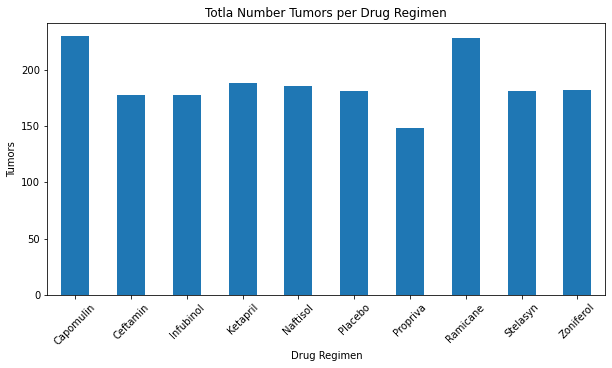

<Figure size 432x288 with 0 Axes>

In [110]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
group_bar_pandas.plot(kind="bar", figsize=(10,5))
#title and Labels
plt.title("Totla Number Tumors per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumors")
plt.xticks(rotation= 45)

#show bar graph
plt.show()
plt.tight_layout()

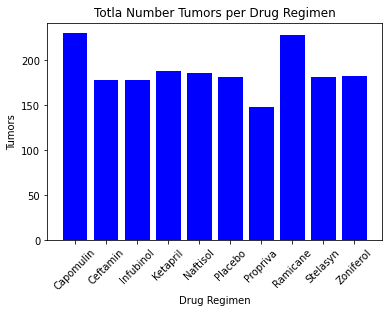

In [111]:

plt.bar(group_bar_pandas.index, group_bar_pandas, color="b", align="center")
plt.xticks(rotation= 45)

#set x & y limits

plt.title("Totla Number Tumors per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumors")

plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_pie_gender = mouse_metadata.groupby('Sex').count()
gender_label= ["Male", "Female"]
gender_num= 
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
